In [23]:
# import dependencies
import pandas as pd
import pipelines
from sklearn.pipeline import Pipeline
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# read in CSV file
letter_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/letter-recognition.csv')
letter_df

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
# set X variable value
X = letter_df.drop('lettr',axis=1)
X

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
# set y variable value
y = letter_df['lettr']
y

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: lettr, Length: 20000, dtype: object

In [5]:
# split data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [6]:
# create label encoder instance and encode y data
y_train_le,y_test_le = pipelines.label(y_train,y_test)


train:[ 9  3 21 ...  7  9  8]
test:[18 11 22 ... 12  4  0]


In [7]:
# Scale training data
X_train_scaled = pipelines.scaled(X_train)
X_train_scaled


array([[-1.57818258, -2.13395577, -2.05244646, ..., -0.87064072,
        -1.44404289,  0.11869205],
       [ 2.60215668,  2.11179698,  1.43370447, ..., -0.22116734,
         2.0697601 , -0.50164967],
       [ 1.55707187,  0.89872477,  0.93568291, ...,  2.37672621,
        -0.66319778,  0.11869205],
       ...,
       [ 2.07961427,  1.80852893,  1.43370447, ..., -0.87064072,
         0.11764733,  0.73903377],
       [-0.01055536,  0.89872477, -0.55838177, ..., -0.87064072,
        -1.44404289,  0.11869205],
       [-1.57818258,  0.29218866, -2.55046802, ..., -0.22116734,
        -1.44404289,  0.11869205]])

In [8]:
# scale testing data
X_test_scaled = pipelines.scaled(X_test)
X_test_scaled


array([[ 1.02874359,  0.59165973, -0.06086148, ..., -0.85095735,
        -0.25968848,  1.97212897],
       [-1.06390001, -1.21254761, -1.04408415, ..., -0.85095735,
        -1.03372269, -1.08904229],
       [ 1.02874359,  0.59165973,  0.43074985, ...,  1.70102151,
        -0.64670558, -0.47680804],
       ...,
       [-0.54073911, -1.81395006, -0.55247282, ..., -2.12694678,
        -0.64670558,  0.13542622],
       [-1.06390001, -0.61114516, -0.55247282, ..., -0.21296264,
         0.12732863,  0.13542622],
       [-0.54073911, -0.91184639, -0.06086148, ..., -0.85095735,
        -0.64670558, -0.47680804]])

In [9]:
# create logistic regression model
lr = LogisticRegression(random_state=1,max_iter=120)
# fit the model
lr.fit(X_train_scaled,y_train_le)
# check scores
print(f'training:{lr.score(X_train_scaled,y_train_le)}\ntesting{lr.score(X_test_scaled,y_test_le)}')


training:0.7788
testing0.7762


In [10]:
# create SVC poly model
svc = SVC(kernel='poly')
# fit the model
svc.fit(X_train_scaled,y_train_le)
#check score
print(f'training:{svc.score(X_train_scaled,y_train_le)}\ntesting:{svc.score(X_test_scaled,y_test_le)}')

training:0.9065333333333333
testing:0.8926


In [11]:
# create SVC linear model
svc_linear = SVC(kernel='linear')
# fit the model
svc_linear.fit(X_train_scaled,y_train_le)

SVC(kernel='linear')

In [12]:
# check model score
print(f'training:{svc_linear.score(X_train_scaled,y_train_le)}\ntesting:{svc_linear.score(X_test_scaled,y_test_le)}')

training:0.8693333333333333
testing:0.8532


In [13]:
# create random forest model
rf = RandomForestClassifier(n_estimators=128,random_state=1)
# fit the model
rf.fit(X_train_scaled,y_train_le)

RandomForestClassifier(n_estimators=128, random_state=1)

In [14]:
# check model score
print(f'training:{rf.score(X_train_scaled,y_train_le)}\ntesting:{rf.score(X_test_scaled,y_test_le)}')

training:1.0
testing:0.963


In [15]:
# create gradient boost model
gr = GradientBoostingClassifier()

# fit the model
gr.fit(X_train_scaled,y_train_le)

GradientBoostingClassifier()

In [16]:
# check model score
print(f'training:{gr.score(X_train_scaled,y_train_le)}\n{gr.score(X_test_scaled,y_test_le)}')

training:0.9600666666666666
0.9186


In [17]:
# create adaboost model low estimators
ada_low = AdaBoostClassifier(n_estimators=20,random_state=1)
# fit the model
ada_low.fit(X_train_scaled,y_train_le)

AdaBoostClassifier(n_estimators=20, random_state=1)

In [18]:
print(f'training:{ada_low.score(X_train_scaled,y_train_le)}\ntesting:{ada_low.score(X_test_scaled,y_test_le)}')

training:0.26866666666666666
testing:0.2602


In [19]:
# create adaboost model
ada = AdaBoostClassifier(n_estimators=2000,random_state=1)
# fit the model
ada.fit(X_train_scaled,y_train_le)

AdaBoostClassifier(n_estimators=2000, random_state=1)

In [20]:
print(f'{ada.score(X_train_scaled,y_train_le)}\ntesting:{ada.score(X_test_scaled,y_test_le)}')

0.2274
testing:0.222


In [32]:
# create comparison dataframe
comparison = pd.DataFrame(
    [
    ['Logistic Regression', lr.score(X_train_scaled,y_train_le),lr.score(X_test_scaled,y_test_le)],    
    ['SVC poly',svc.score(X_train_scaled,y_train_le), svc.score(X_test_scaled,y_test_le)],
    ['SVC linear',svc_linear.score(X_train_scaled,y_train_le),svc_linear.score(X_test_scaled,y_test_le)],
    ['Random Forest',rf.score(X_train_scaled,y_train_le),rf.score(X_test_scaled,y_test_le)],
    ['Gradient Boosting',gr.score(X_train_scaled,y_train_le),gr.score(X_test_scaled,y_test_le)],
    ['Ada Boost(low)',ada_low.score(X_train_scaled,y_train_le),ada_low.score(X_test_scaled,y_test_le)],
    ['Ada boost',ada.score(X_train_scaled,y_train_le),ada.score(X_test_scaled,y_test_le)],
    ],
    columns=['Model Name','Trained Score', 'Test Score']
).sort_values(by='Test Score', ascending=False).set_index('Model Name')
comparison

,Trained Score,Test Score
Model Name,,
Random Forest,1.000000,0.9630
Gradient Boosting,0.960067,0.9186
SVC poly,0.906533,0.8926
SVC linear,0.869333,0.8532
Logistic Regression,0.778800,0.7762
Ada Boost(low),0.268667,0.2602
Ada boost,0.227400,0.2220


<Axes: xlabel='Model Name'>

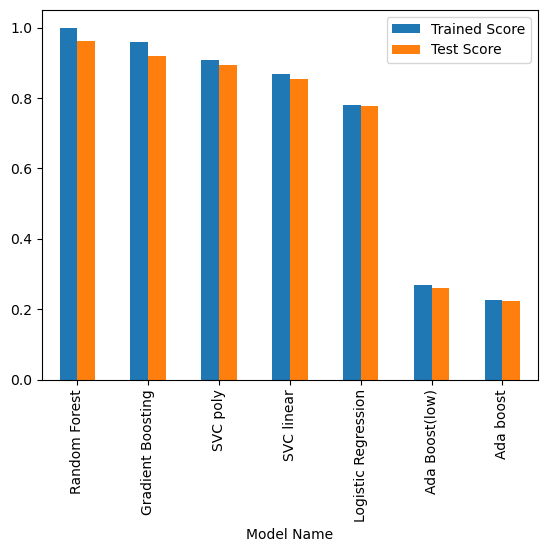

In [33]:
#plot comparison dataframe to show which is best visually
comparison.plot.bar()